In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarro

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #making graphs
import seaborn as sns #for plotting 
plt.style.use('ggplot') #using style for graphs in matplotlib by using ggplot style
import datetime as dt
#pd.set_option('max_column') #to see all the columns


In [3]:
#Preapare the Data
#find out daily activity to get all importanat data
df = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [4]:
#exploring the data 
df.shape

(940, 15)

In [5]:
#find out columns name
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [6]:
#preview information inside the first ten columns 
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [7]:
#find out data types 
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [8]:
#Clean The Data
#Reformating columns as id has to be string
df['Id'] = df['Id'].astype(str)

#reformating column ActivityDate object o date type
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format='%m/%d/%Y')

In [9]:
#creating new column
df['distance_diff'] = df['TotalDistance'] - df['TrackerDistance']

In [10]:
df['distance_diff'].value_counts()

distance_diff
0.000000    925
1.830000      1
0.190001      1
0.040000      1
0.810000      1
1.049999      1
0.760000      1
1.070000      1
0.980000      1
0.900001      1
1.140000      1
1.160000      1
0.880000      1
0.460000      1
1.160000      1
1.060000      1
Name: count, dtype: int64

In [11]:
df.query('distance_diff > 0.0')

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,distance_diff
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,1.830000
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,0.190001
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,0.040000
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,0.810000
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,1.049999
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,0.760000
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,1.070000
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,0.980000
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,0.900001
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,1.140000


In [12]:
#making columns in lower case for simplysity 
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories',
       'distance_diff'],
      dtype='object')

In [13]:
#renaming columns to read it properly with proper naming practice by using underscore 
df.rename(columns = {'activitydate':'activity_date', 'totalsteps':'total_steps', 'totaldistance':'total_distance', 'trackerdistance':'tracker_distance',
       'loggedactivitiesdistance':'logged_activities_distance', 'veryactivedistance':'very_active_distance',
       'moderatelyactivedistance':'moderately_active_distance', 'lightactivedistance':'light_active_distance',
       'sedentaryactivedistance':'sedentary_active_distance', 'veryactiveminutes':'very_active_minutes', 'fairlyactiveminutes':'fairly_active_minutes',
       'lightlyactiveminutes':'lightly_active_minutes', 'sedentaryminutes':'sedentary_minutes'}, inplace=True)
df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'distance_diff'],
      dtype='object')

In [14]:
#find day of the week
#create columns to find out number of the day in a week by date time function 
day_of_week = df['activity_date'].dt.day_name()
df['day_of_week'] = day_of_week

df['n_day_of_week'] = df['activity_date'].dt.weekday #0 monday 6 sunday

In [15]:
df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'distance_diff', 'day_of_week', 'n_day_of_week'],
      dtype='object')

In [16]:
#checking first 4 raws
df.head(4)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0.0,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,0.0,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,0.0,Thursday,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,0.0,Friday,4


In [17]:
#checking empty/null values
df.isna() # return boolean seriece if its falls or true 
df.isna().sum() # want to find sum of columns 

id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
distance_diff                 0
day_of_week                   0
n_day_of_week                 0
dtype: int64

In [18]:
df.head(3)
#we don't know if distance is in miles or kms.

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0.0,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,0.0,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,0.0,Thursday,3


In [19]:
# checking duplicates- if zero then there is no duplicate value
df.duplicated().sum() 
#if result is zero, means it doesn't have any duplicate in a row with exact same data which is good

0

In [20]:
#subset the data
#using specific columns and not all the columns
#creating another variable
df = df[['id', 'activity_date', 'total_steps', 'total_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'distance_diff', 'day_of_week', 'n_day_of_week']].copy()

In [21]:
df.head(4)

,id,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,0.0,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,0.0,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,0.0,Thursday,3
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,0.0,Friday,4


In [22]:
#analysis phase
#aanalyz the users about their action, pattern
#categories 1
#physical activity analysis - 

#Activity level	Steps per day
#sedentary - upto 4999 steps
#lightly active - between 5000 steps and 7900 steps
#fairy active - between 8000 steps and 11999 steps
#very active - over 12000 steps

#find out how many values do we have

id_grp = df.groupby(['id'])
#find out average and mean of the total steps
id_avg_step = id_grp['total_steps'].mean().sort_values(ascending=False)
#df['activity_date'].value_counts()
id_avg_step = id_avg_step.to_frame()

#creating conditions for ach category of the steps
conditions = [
    (id_avg_step <= 4900),
    (id_avg_step >= 5000) & (id_avg_step <= 7900),
    (id_avg_step >= 8000) & (id_avg_step <= 11999),
    (id_avg_step >= 12000)
]
values = ['sedentary','lightly_active','fairly active','vary_active']

#creating column for activity level category
id_avg_step['activity_level'] = np.select(conditions, values)

#store variable
id_activity_level = id_avg_step['activity_level']
#showing another column for to display category
id_avg_step

#list comprehencen 
df['activity_level'] = [id_activity_level[c] for c in df['id']]

In [23]:
df.head(10)

,id,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,day_of_week,n_day_of_week,activity_level
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,0.0,Tuesday,1,vary_active
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,0.0,Wednesday,2,vary_active
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,0.0,Thursday,3,vary_active
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,0.0,Friday,4,vary_active
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,0.0,Saturday,5,vary_active
5,1503960366,2016-04-17,9705,6.48,38,20,164,539,1728,0.0,Sunday,6,vary_active
6,1503960366,2016-04-18,13019,8.59,42,16,233,1149,1921,0.0,Monday,0,vary_active
7,1503960366,2016-04-19,15506,9.88,50,31,264,775,2035,0.0,Tuesday,1,vary_active
8,1503960366,2016-04-20,10544,6.68,28,12,205,818,1786,0.0,Wednesday,2,vary_active
9,1503960366,2016-04-21,9819,6.34,19,8,211,838,1775,0.0,Thursday,3,vary_active


In [24]:
df['id'].value_counts()

id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

In [25]:
#describing our data to analyze
df.describe()

,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,n_day_of_week
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574,0.014351,2.918085
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000,0.000000,1.000000
50%,2016-04-26 00:00:00,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000,0.000000,3.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000,0.000000,5.000000
max,2016-05-12 00:00:00,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000,1.830000,6.000000
std,NaN,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862,0.124458,1.942379


In [26]:
df['day_of_week'].unique()


array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

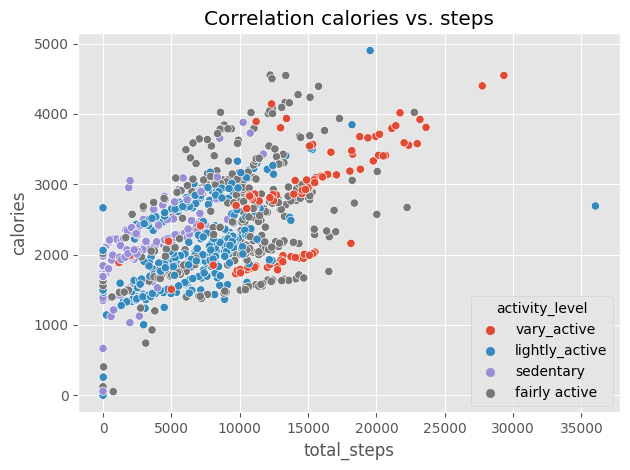

In [27]:
#share - scatter plot diagram
# correlation between steps ad calories burned

ax = sns.scatterplot(x= 'total_steps', y='calories', data=df, hue=df['activity_level'])

plt.title('Correlation calories vs. steps')
plt.tight_layout()
plt.show()

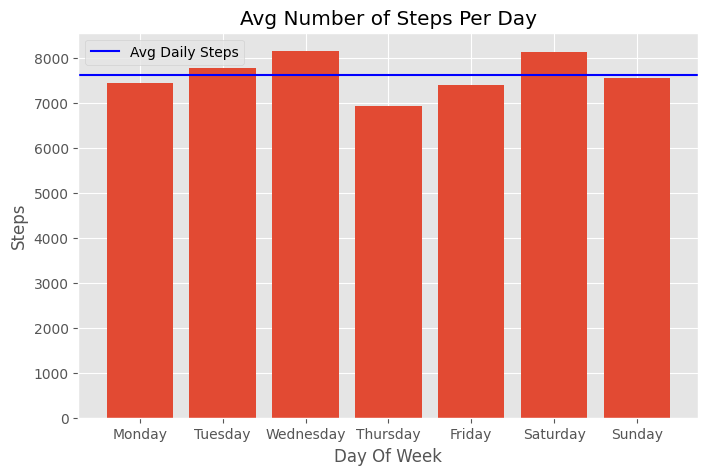

In [28]:
#average steps per day to know on what day people do more steps

day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax = plt.subplots(1,1,figsize=(8,5))

day_grp = df.groupby(['day_of_week'])
avg_daily_steps = day_grp['total_steps'].mean()
avg_steps = df['total_steps'].mean()

plt.bar(avg_daily_steps.index, avg_daily_steps)

#labeling days
ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(y=avg_daily_steps.mean(), color='blue', label='Avg Daily Steps')
ax.set_ylabel('Steps')
ax.set_xlabel('Day Of Week')
ax.set_title('Avg Number of Steps Per Day')
plt.legend()
plt.show()


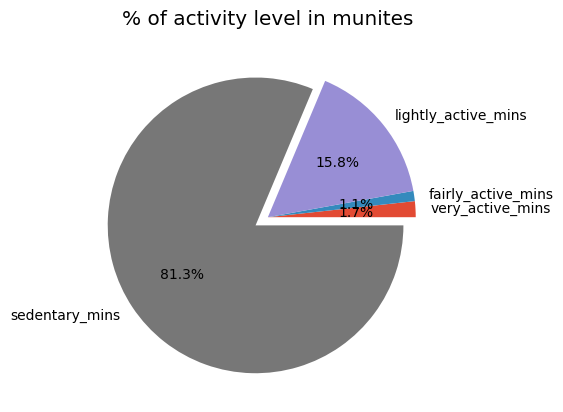

In [29]:
#percentage of actvity in minutes


   #'very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes'

very_active_mins = df['very_active_minutes'].sum()
fairly_active_mins = df['fairly_active_minutes'].sum()
lightly_active_mins = df['lightly_active_minutes'].sum()
sedentary_mins = df['sedentary_minutes'].sum()

#slices of the pie are abouve variables which are labels

slices = [very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins]

labels = ['very_active_mins', 'fairly_active_mins', 'lightly_active_mins', 'sedentary_mins']

explode = [0,0,0,0.1] #seperated the slices

#creating pie graph
plt.pie(slices, labels = labels, explode = explode, autopct = '%1.1f%%')


plt.title('% of activity level in munites')
plt.show()

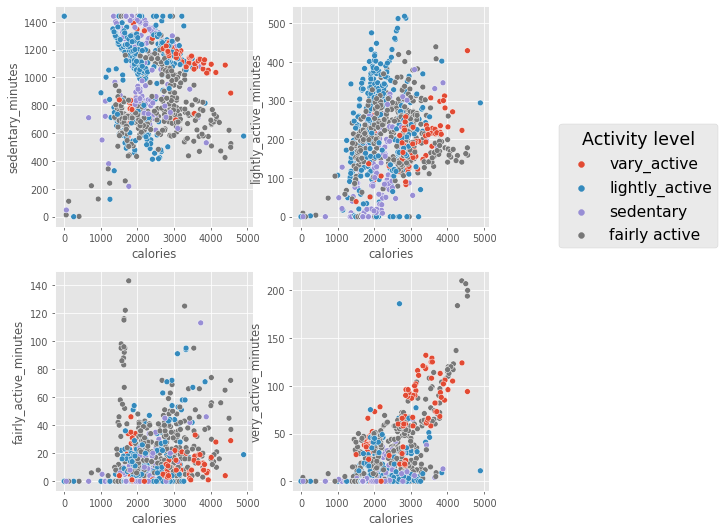

In [30]:
#corerelation between activity level in minutes and calories
# more minutes users are active, more calories have been burn

n_day_of_week = [0,1,2,3,4,5,6]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,9), dpi=70)

sns.scatterplot(data=df, x='calories', y='sedentary_minutes', hue='activity_level', ax=axes[0,0], legend=False)
sns.scatterplot(data=df, x='calories', y='lightly_active_minutes', hue='activity_level', ax=axes[0,1], legend=False)
sns.scatterplot(data=df, x='calories', y='fairly_active_minutes', hue='activity_level', ax=axes[1,0], legend=False)
sns.scatterplot(data=df, x='calories', y='very_active_minutes', hue='activity_level', ax=axes[1,1], legend=True)

plt.legend(title = 'Activity level',fontsize=16, title_fontsize=18, bbox_to_anchor = (2.2, 1.7))

plt.show()

In [31]:
#category 2
#how many minutes user using the device
#low use of device: less than 6 hours per day
#normal use of device: between 6 and 12 hours per day
#high use of device: more than 12 hours and upto 24 hours

